##Import necessory libraries

In [9]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM


##Data preprocessing and visualization

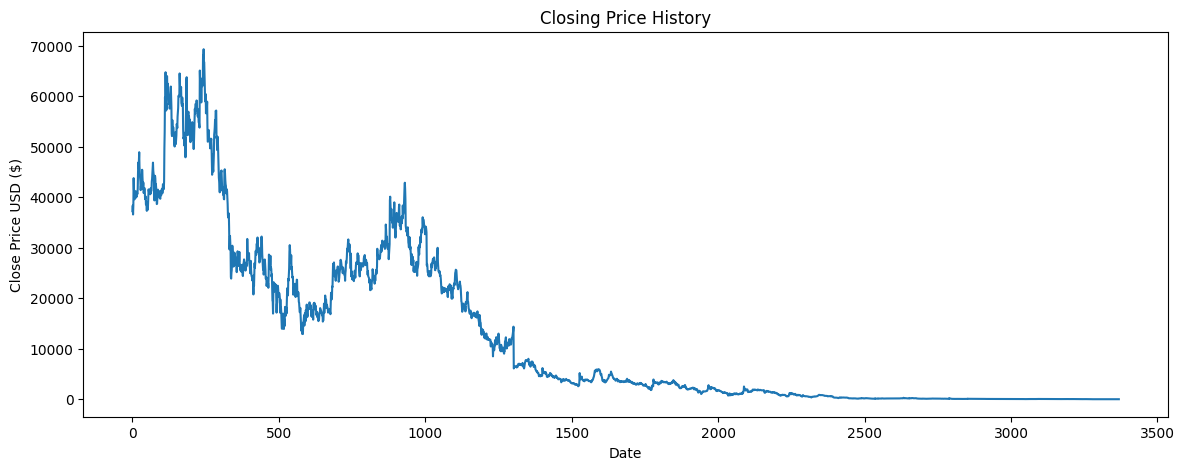

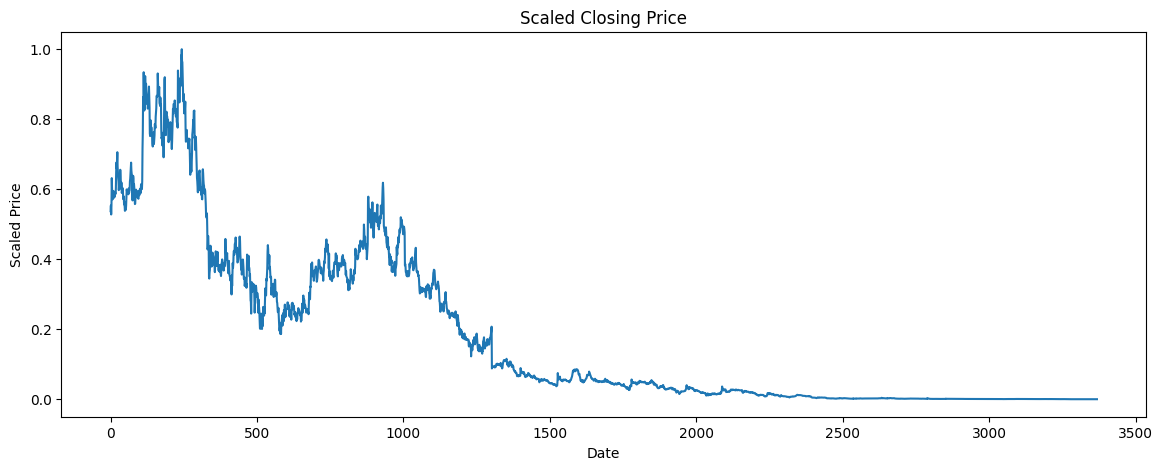

In [5]:
df=pd.read_csv('YTEN.csv')

plt.figure(figsize=(14, 5))
plt.plot(df['Close'])
plt.title('Closing Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()
if df.isnull().values.any():
    raise ValueError("DataFrame contains missing values")
if 'Close' not in df.columns:
    raise ValueError("DataFrame must contain 'Close' column")
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
plt.figure(figsize=(14, 5))
plt.plot(scaled_data)
plt.title('Scaled Closing Price')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.show()

##Creating training and testing data i-e 80% for training and 20% for testing

In [7]:
train_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:train_data_len]
test_data = scaled_data[train_data_len - 60:]
def create_dataset(data, window_size=60):
    x, y = [], []
    for i in range(window_size, len(data)):
        x.append(data[i - window_size:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)
window_size = 60
x_train, y_train = create_dataset(train_data, window_size)
x_test, y_test = create_dataset(test_data, window_size)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

##Implementing the LSTM

In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

##Training the model with epoch 1

In [10]:
model.fit(x_train, y_train, batch_size=1, epochs=1)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


22/22 [==============================] - 1s 17ms/step


##Calculating the error in the model

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print(f'RMSE: {rmse}')
mape = mean_absolute_percentage_error(y_test_actual, predictions) * 100
print(f'MAPE: {mape}%')
r2 = r2_score(y_test_actual, predictions)
print(f'R² Score: {r2}')


22/22 [==============================] - 0s 16ms/step
RMSE: 800.8986962811199
MAPE: 3319.7473385678336%
R² Score: -554.94827673958


##Evaluation and visualization of the model

RMSE: 800.8510986736337


<ipython-input-11-fbadea6b068f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


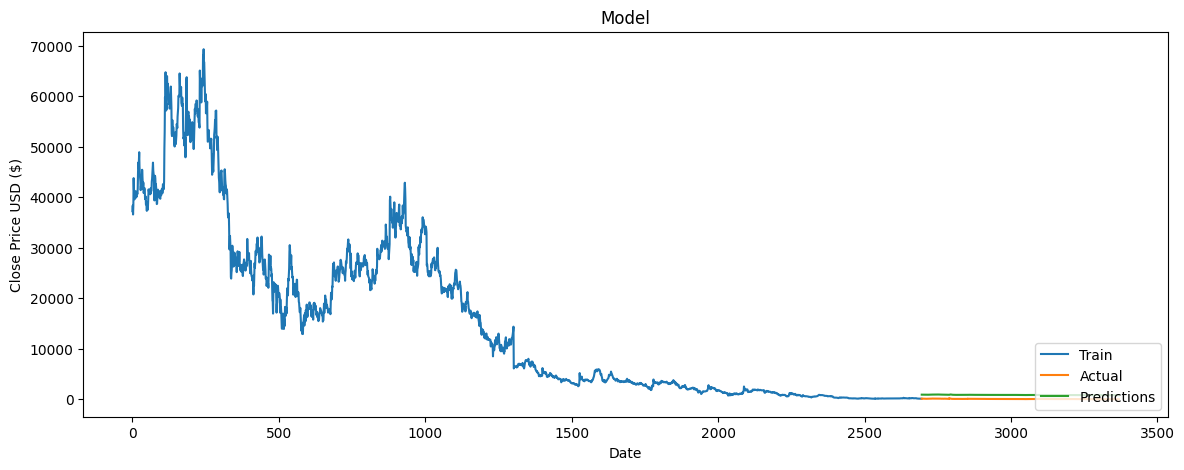

In [11]:
rmse = np.sqrt(np.mean(predictions - y_test_actual) ** 2)
print(f'RMSE: {rmse}')
train = df[:train_data_len]
valid = df[train_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(14, 5))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'], label='Training Data')
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()
